In [33]:
import pandas as pd
import numpy as np

In [34]:
processed = 'processed'
submissions = 'submissions'
features = 'features'
df_train = pd.read_csv(f'{processed}/train.csv')
df_test =  pd.read_csv(f'{processed}/test.csv')

In [35]:
df_train = df_train.merge(pd.read_csv(f'{features}/pclass_dummy_train.csv'))
df_test =  df_test.merge(pd.read_csv(f'{features}/pclass_dummy_test.csv'))

In [41]:
df_train.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'src', 'Sex_female',
       'Sex_male', 'Age_na', 'Age_is(0..2]', 'Age_is(2..6]', 'Age_is(6..14]',
       'Age_is(14..16]', 'Age_is(16..18]', 'Age_is(18..25]', 'Age_is(25..35]',
       'Age_is(35..40]', 'Age_is(40..45]', 'Age_is(45..60]', 'Age_is(60..80]',
       'Age_q_is(0.169..14.0]', 'Age_q_is(14.0..19.0]', 'Age_q_is(19.0..22.0]',
       'Age_q_is(22.0..25.0]', 'Age_q_is(25.0..28.0]', 'Age_q_is(28.0..31.0]',
       'Age_q_is(31.0..36.0]', 'Age_q_is(36.0..42.0]', 'Age_q_is(42.0..50.0]',
       'Age_q_is(50.0..80.0]', 'Pclass_is_1', 'Pclass_is_2', 'Pclass_is_3'],
      dtype='object')

In [42]:
field_name = 'Survived'
feature_names = ['SibSp', 'Sex_male', 'Sex_female']\
    + [col for col in df_test.columns if 'Age_is' in col]\
    + [col for col in df_test.columns if 'Pclass_is' in col]
feature_names

['SibSp',
 'Sex_male',
 'Sex_female',
 'Age_is(0..2]',
 'Age_is(2..6]',
 'Age_is(6..14]',
 'Age_is(14..16]',
 'Age_is(16..18]',
 'Age_is(18..25]',
 'Age_is(25..35]',
 'Age_is(35..40]',
 'Age_is(40..45]',
 'Age_is(45..60]',
 'Age_is(60..80]',
 'Pclass_is_1',
 'Pclass_is_2',
 'Pclass_is_3']

In [43]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

cl = GradientBoostingClassifier()

kfold = KFold(random_state=42, n_splits=5)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(cl, df_train[feature_names], df_train[field_name], cv=kfold)
np.mean(accuracies)

0.8080911430544221

In [44]:
cl.fit(df_train[feature_names], df_train[field_name])
y_test = cl.predict(df_test[feature_names])
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_test})
df_submit['Survived'] = df_submit['Survived'].astype(int)
df_submit.to_csv(f'{submissions}/submission015.csv', index=False)

In [45]:
# LB score: 0.75119 (lowest from what we had so far)
!head submissions/submission015.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,1
898,1
899,0
900,0


In [46]:
!open submissions
!open https://www.kaggle.com/c/titanic/submit

In [47]:
df_features = pd.DataFrame({'name': feature_names, 'importance': cl.feature_importances_})
df_features.sort_values('importance', ascending=False, inplace=True)

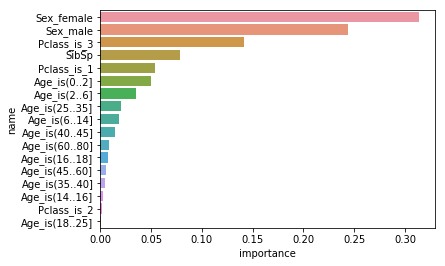

In [48]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="importance", y="name", data=df_features)